## MAP0214 - Cálculo Numérico e aplicações em física
### Henrique Bueno de Lima - Nº USP: 9302305
### EP1 - Profº Arnaldo Gammal

In [104]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as pl

pl.rc('xtick', labelsize=16)
pl.rc('ytick', labelsize=16)

### a) Cálculo da raiz de $f(x) = x³ - \cos(x²)$ pelo método da bissecção:

In [167]:
def raiz_Bissec(funcao, x, precisao):
    xa = x[0]
    xb = x[-1]
    while(abs(xb-xa) > precisao): # Enquanto não atinjo a precisão, o método continua
        xm = (xa+xb)/2
        fm = funcao(xm)
        if (funcao(xa)*funcao(xm)>0): # Se os sinais forem iguais, xa recebe xm
            xa = xm
            fm = funcao(xa)
        else:
            xb = xm
            fm = funcao(xb)
    x0 = xb
    print('O zero está no intervalo de x: [%.3f, %.3f]'%(xa, xb))
    return x0
def funcao1(x):
    return x**3 - np.cos(x**2)

In [165]:
x = np.linspace(-2, 2, 100)
x0 = raiz_Bissec(funcao1, x, 0.001)
print('x0 =%.5f e f(x0) = %.5f'% (x0, funcao1(x0)))

O zero está no intervalo de x: [0.889, 0.890]
x0 =0.88965 e f(x0) = 0.00134


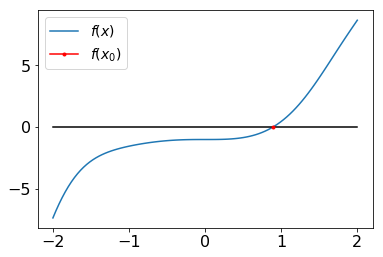

In [166]:
pl.errorbar(x0, funcao1(x0), marker='.', c='r', label='$f(x_0)$')
pl.plot(x, funcao1(x), label='$f (x)$')
pl.plot(x, np.zeros(len(x)), c='k')
pl.legend(fontsize=14)